In [36]:
!pip install fuzzywuzzy


In [25]:
!pip install pydistance


  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/125.4 kB ? eta -:--:--
   --- ------------------------------------ 10.2/125.4 kB ? eta -:--:--
   ---------------------- ---------------- 71.7/125.4 kB 991.0 kB/s eta 0:00:01
   ---------------------------------------- 125.4/125.4 kB 1.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/164.7 kB ? eta -:--:--
   ------------------- -------------------- 81.9/164.7 kB 1.6 MB/s eta 0:00:01
   -------------------------------- ------- 133.1/164.7 kB 1.6 MB/s eta 0:00:01
   -------------------------------- ------- 133.1/164.7 kB 1.6 MB/s eta 0:00:01
   -------------------------------- ------- 133.1/164.7 kB 1.6 MB/s eta 0:00:01
   -------------------------------------- 164.7/164.7 kB 660.1 kB/s eta 0:00:00
   ---------------------------------------- 0.0/40.3 kB ? eta -:--:--
   ------------------------------ --------- 30.7/40.3 k

In [28]:
!pip install python-Levenshtein


   ---------------------------------------- 0.0/98.5 kB ? eta -:--:--
   ---------------- ----------------------- 41.0/98.5 kB 991.0 kB/s eta 0:00:01
   ---------------------------------------- 98.5/98.5 kB 939.1 kB/s eta 0:00:00
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
    --------------------------------------- 0.0/1.7 MB 2.0 MB/s eta 0:00:01
   -- ------------------------------------- 0.1/1.7 MB 1.5 MB/s eta 0:00:02
   --- ------------------------------------ 0.2/1.7 MB 1.4 MB/s eta 0:00:02
   ----- ---------------------------------- 0.2/1.7 MB 1.3 MB/s eta 0:00:02
   ------- -------------------------------- 0.3/1.7 MB 1.4 MB/s eta 0:00:01
   -------- ------------------------------- 0.4/1.7 MB 1.4 MB/s eta 0:00:01
   ---------- ----------------------------- 0.4/1.7 MB 1.4 MB/s eta 0:00:01
   ----------- ---------------------------- 0.5/1.7 MB 1.3 MB/s eta 0:00:01
   ------------ --------------------------- 0.5/1.7 MB 1.2 MB/s eta 0:00:01
   --------------

In [2]:
#venv toxic
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
from bs4 import BeautifulSoup
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('train_data.csv')
df.sample(3)

id    qid1    qid2  \
51510    51510   91355   91356   
385885  385885  518045  518046   
236575  236575  285290  130885   

                                                question1  \
51510   How do I count number of running process on li...   
385885  What are some things new employees should know...   
236575            What's it like being a child of incest?   

                                                question2  is_duplicate  
51510   How do I open another Terminal from one termin...             0  
385885  What are some things new employees should know...             0  
236575  What is it like to be the child of a billionaire?             0

In [4]:
new_df = df.sample(20000,random_state=2)

In [5]:
def preprocess(q):
    
    q = str(q).lower().strip()
    
    # Replace certain special characters with their string equivalents
    q = q.replace('%', ' percent')
    q = q.replace('$', ' dollar ')
    q = q.replace('₹', ' rupee ')
    q = q.replace('€', ' euro ')
    q = q.replace('@', ' at ')
    
    # The pattern '[math]' appears around 900 times in the whole dataset.
    q = q.replace('[math]', '')
    
    # Replacing some numbers with string equivalents (not perfect, can be done better to account for more cases)
    q = q.replace(',000,000,000 ', 'b ')
    q = q.replace(',000,000 ', 'm ')
    q = q.replace(',000 ', 'k ')
    q = re.sub(r'([0-9]+)000000000', r'\1b', q)
    q = re.sub(r'([0-9]+)000000', r'\1m', q)
    q = re.sub(r'([0-9]+)000', r'\1k', q)
    
    # Decontracting words
    # https://en.wikipedia.org/wiki/Wikipedia%3aList_of_English_contractions
    # https://stackoverflow.com/a/19794953
    contractions = { 
    "ain't": "am not",
    "aren't": "are not",
    "can't": "can not",
    "can't've": "can not have",
      "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "i would",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'll've": "i will have",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so as",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
     "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
     "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have"
    }

    q_decontracted = []

    for word in q.split():
        if word in contractions:
            word = contractions[word]

        q_decontracted.append(word)

    q = ' '.join(q_decontracted)
    q = q.replace("'ve", " have")
    q = q.replace("n't", " not")
    q = q.replace("'re", " are")
    q = q.replace("'ll", " will")
    
    # Removing HTML tags
    q = BeautifulSoup(q)
    q = q.get_text()
     # Remove punctuations
    pattern = re.compile('\W')
    q = re.sub(pattern, ' ', q).strip()

    
    return q
    

In [6]:
preprocess("I've already! wasn't <b>done</b>?")

'i have already  was not done'

In [7]:
new_df['question1'] = new_df['question1'].apply(preprocess)
new_df['question2'] = new_df['question2'].apply(preprocess)

In [8]:
new_df.head()

id    qid1    qid2  \
398782  398782  496695  532029   
115086  115086  187729  187730   
327711  327711  454161  454162   
367788  367788  498109  491396   
151235  151235  237843   50930   

                                                question1  \
398782  what is the best marketing automation tool for...   
115086   i am poor but i want to invest  what should i do   
327711  i am from india and live abroad  i met a guy f...   
367788  why do so many people in the u s  hate the sou...   
151235                 consequences of bhopal gas tragedy   

                                                question2  is_duplicate  
398782  what is the best marketing automation tool for...             1  
115086  i am quite poor and i want to be very rich  wh...             0  
327711  t i e t to thapar university to thapar univers...             0  
367788  my boyfriend doesnt feel guilty when he hurts ...             0  
151235  what was the reason behind the bhopal gas tragedy             0

In [9]:
new_df.shape

(20000, 6)

In [10]:
new_df['q1_len'] = new_df['question1'].str.len() 
new_df['q2_len'] = new_df['question2'].str.len()

In [11]:
new_df['q1_num_words'] = new_df['question1'].apply(lambda row: len(row.split(" ")))
new_df['q2_num_words'] = new_df['question2'].apply(lambda row: len(row.split(" ")))

In [12]:
def common_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
    return len(w1 & w2)
new_df['word_common'] = new_df.apply(common_words, axis=1)

In [13]:
def total_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
    return (len(w1) + len(w2))
new_df['word_total'] = new_df.apply(total_words, axis=1)

In [14]:
new_df['word_share'] = round(new_df['word_common']/new_df['word_total'],2)

In [15]:
new_df.head(2)

id    qid1    qid2  \
398782  398782  496695  532029   
115086  115086  187729  187730   

                                                question1  \
398782  what is the best marketing automation tool for...   
115086   i am poor but i want to invest  what should i do   

                                                question2  is_duplicate  \
398782  what is the best marketing automation tool for...             1   
115086  i am quite poor and i want to be very rich  wh...             0   

        q1_len  q2_len  q1_num_words  q2_num_words  word_common  word_total  \
398782      75      76            13            13           12          26   
115086      48      56            13            16            8          24   

        word_share  
398782        0.46  
115086        0.33

#### Advanced features

In [16]:
from nltk.corpus import stopwords

def fetch_token_features(row):
    
    q1 = row['question1']
    q2 = row['question2']
    
    SAFE_DIV = 0.0001 

    STOP_WORDS = stopwords.words("english")
    
    token_features = [0.0]*8
    
    # Converting the Sentence into Tokens: 
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    
    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return token_features

    # Get the non-stopwords in Questions
    q1_words = set([word for word in q1_tokens if word not in STOP_WORDS])
    q2_words = set([word for word in q2_tokens if word not in STOP_WORDS])
    
    #Get the stopwords in Questions
    q1_stops = set([word for word in q1_tokens if word in STOP_WORDS])
    q2_stops = set([word for word in q2_tokens if word in STOP_WORDS])
    
    # Get the common non-stopwords from Question pair
    common_word_count = len(q1_words.intersection(q2_words))
    
    # Get the common stopwords from Question pair
    common_stop_count = len(q1_stops.intersection(q2_stops))
    # Get the common Tokens from Question pair
    common_token_count = len(set(q1_tokens).intersection(set(q2_tokens)))
    
    
    token_features[0] = common_word_count / (min(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[1] = common_word_count / (max(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[2] = common_stop_count / (min(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[3] = common_stop_count / (max(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[4] = common_token_count / (min(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    token_features[5] = common_token_count / (max(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    
    # Last word of both question is same or not
    token_features[6] = int(q1_tokens[-1] == q2_tokens[-1])
    
    # First word of both question is same or not
    token_features[7] = int(q1_tokens[0] == q2_tokens[0])
    
    return token_features

In [17]:
token_features = new_df.apply(fetch_token_features, axis=1)

new_df["cwc_min"]       = list(map(lambda x: x[0], token_features))
new_df["cwc_max"]       = list(map(lambda x: x[1], token_features))
new_df["csc_min"]       = list(map(lambda x: x[2], token_features))
new_df["csc_max"]       = list(map(lambda x: x[3], token_features))
new_df["ctc_min"]       = list(map(lambda x: x[4], token_features))
new_df["ctc_max"]       = list(map(lambda x: x[5], token_features))
new_df["last_word_eq"]  = list(map(lambda x: x[6], token_features))
new_df["first_word_eq"] = list(map(lambda x: x[7], token_features))

In [18]:
new_df.head(2)

id    qid1    qid2  \
398782  398782  496695  532029   
115086  115086  187729  187730   

                                                question1  \
398782  what is the best marketing automation tool for...   
115086   i am poor but i want to invest  what should i do   

                                                question2  is_duplicate  \
398782  what is the best marketing automation tool for...             1   
115086  i am quite poor and i want to be very rich  wh...             0   

        q1_len  q2_len  q1_num_words  q2_num_words  ...  word_total  \
398782      75      76            13            13  ...          26   
115086      48      56            13            16  ...          24   

        word_share   cwc_min   cwc_max   csc_min   csc_max   ctc_min  \
398782        0.46  0.874989  0.874989  0.999980  0.999980  0.923070   
115086        0.33  0.666644  0.499988  0.714276  0.624992  0.583328   

         ctc_max  last_word_eq  first_word_eq  
398782  0.923070             1              1  
115086  0.466664             1              1  

[2 rows x 21 columns]

In [19]:
import nltk
from nltk.metrics import edit_distance

def fetch_length_features(row):
    q1 = row['question1']
    q2 = row['question2']
    
    length_features = [0.0] * 3
    
    # Converting the Sentence into Tokens: 
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    
    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return length_features
    
    # Absolute length features
    length_features[0] = abs(len(q1_tokens) - len(q2_tokens))
    
    # Average Token Length of both Questions
    length_features[1] = (len(q1_tokens) + len(q2_tokens)) / 2
    
    # Longest common substring using edit distance
    lcs_length = len(q1) + len(q2) - 2 * edit_distance(q1, q2)
    length_features[2] = lcs_length / (min(len(q1), len(q2)) + 1)
    
    return length_features

length_features = new_df.apply(fetch_length_features, axis=1)

new_df['abs_len_diff'] = list(map(lambda x: x[0], length_features))
new_df['mean_len'] = list(map(lambda x: x[1], length_features))
new_df['longest_substr_ratio'] = list(map(lambda x: x[2], length_features))


In [20]:
# Fuzzy Features
from fuzzywuzzy import fuzz

def fetch_fuzzy_features(row):
    
    q1 = row['question1']
    q2 = row['question2']
    
    fuzzy_features = [0.0]*4
    
    # fuzz_ratio
    fuzzy_features[0] = fuzz.QRatio(q1, q2)

    # fuzz_partial_ratio
    fuzzy_features[1] = fuzz.partial_ratio(q1, q2)

    # token_sort_ratio
    fuzzy_features[2] = fuzz.token_sort_ratio(q1, q2)

    # token_set_ratio
    fuzzy_features[3] = fuzz.token_set_ratio(q1, q2)

    return fuzzy_features

In [21]:
fuzzy_features = new_df.apply(fetch_fuzzy_features, axis=1)

# Creating new feature columns for fuzzy features
new_df['fuzz_ratio'] = list(map(lambda x: x[0], fuzzy_features))
new_df['fuzz_partial_ratio'] = list(map(lambda x: x[1], fuzzy_features))
new_df['token_sort_ratio'] = list(map(lambda x: x[2], fuzzy_features))
new_df['token_set_ratio'] = list(map(lambda x: x[3], fuzzy_features))

In [22]:
print(new_df.shape)
new_df.head(2)

(20000, 28)


id    qid1    qid2  \
398782  398782  496695  532029   
115086  115086  187729  187730   

                                                question1  \
398782  what is the best marketing automation tool for...   
115086   i am poor but i want to invest  what should i do   

                                                question2  is_duplicate  \
398782  what is the best marketing automation tool for...             1   
115086  i am quite poor and i want to be very rich  wh...             0   

        q1_len  q2_len  q1_num_words  q2_num_words  ...   ctc_max  \
398782      75      76            13            13  ...  0.923070   
115086      48      56            13            16  ...  0.466664   

        last_word_eq  first_word_eq  abs_len_diff  mean_len  \
398782             1              1             0      13.0   
115086             1              1             3      13.5   

        longest_substr_ratio  fuzz_ratio  fuzz_partial_ratio  \
398782              1.960526          99                  99   
115086              1.142857          69                  67   

        token_sort_ratio  token_set_ratio  
398782                99               99  
115086                67               74  

[2 rows x 28 columns]

##### EDA on the newly derived features

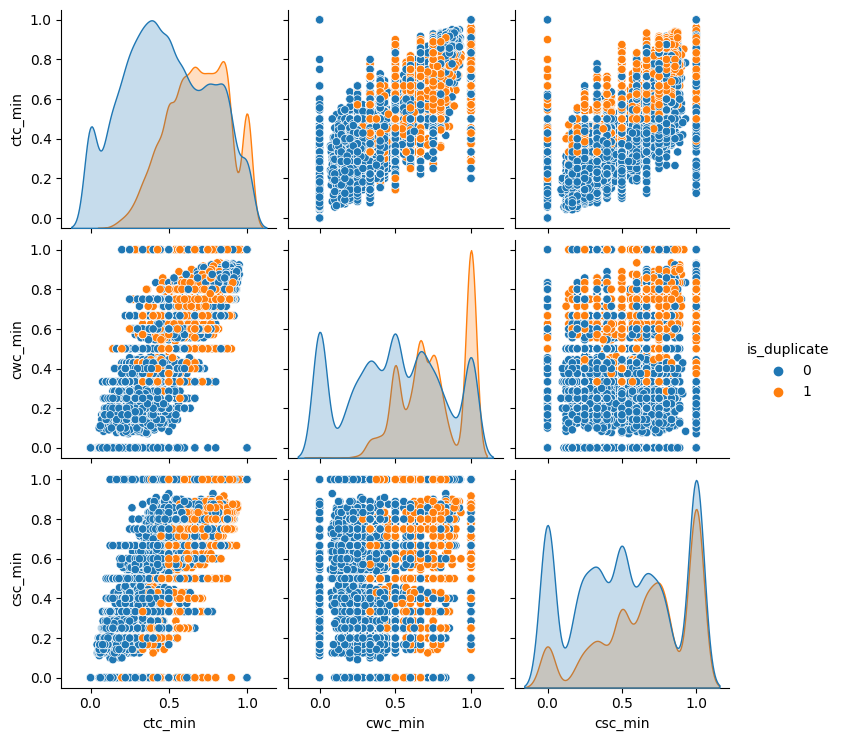

In [40]:
sns.pairplot(new_df[['ctc_min', 'cwc_min', 'csc_min', 'is_duplicate']],hue='is_duplicate')

From the graph it can be understood that, the diagonal elements show that the distributions of the features differ between duplicates and non-duplicates, especially at higher values.
The scatter plots indicate that combinations of these features (especially when both values are high) are more likely to be associated with duplicates.

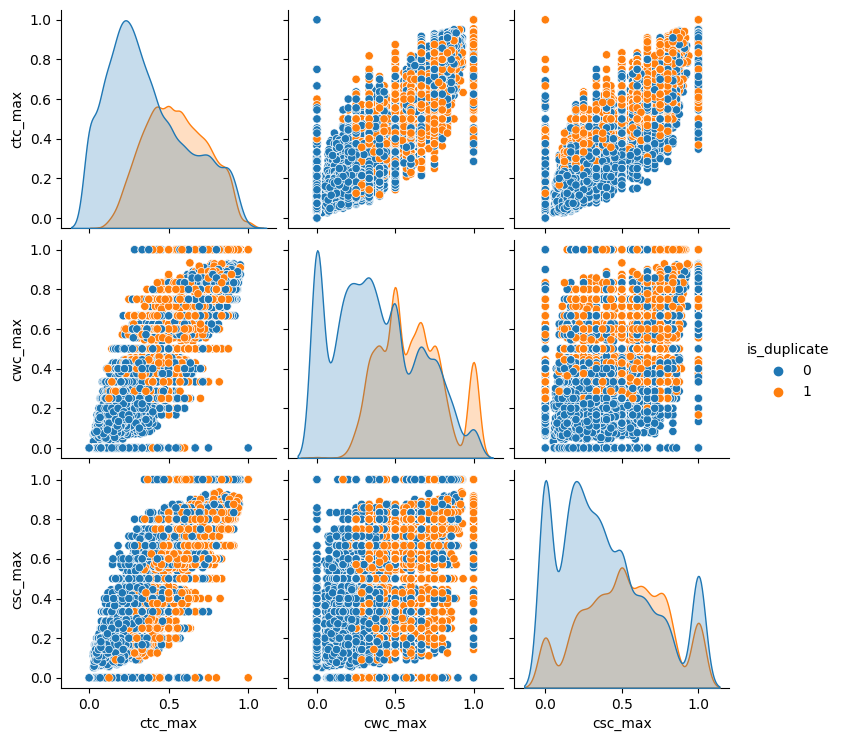

In [41]:
sns.pairplot(new_df[['ctc_max', 'cwc_max', 'csc_max', 'is_duplicate']],hue='is_duplicate')

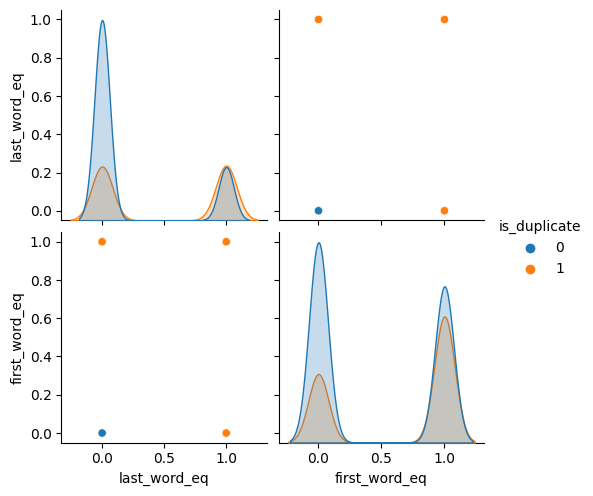

In [42]:
sns.pairplot(new_df[['last_word_eq', 'first_word_eq', 'is_duplicate']],hue='is_duplicate')

last word of majority sentences in non duplicates are not equal . Similar is the case with fisrt word equal. These features alone are not strong discriminators. They might be more useful when combined with other features to improve the overall model performance.

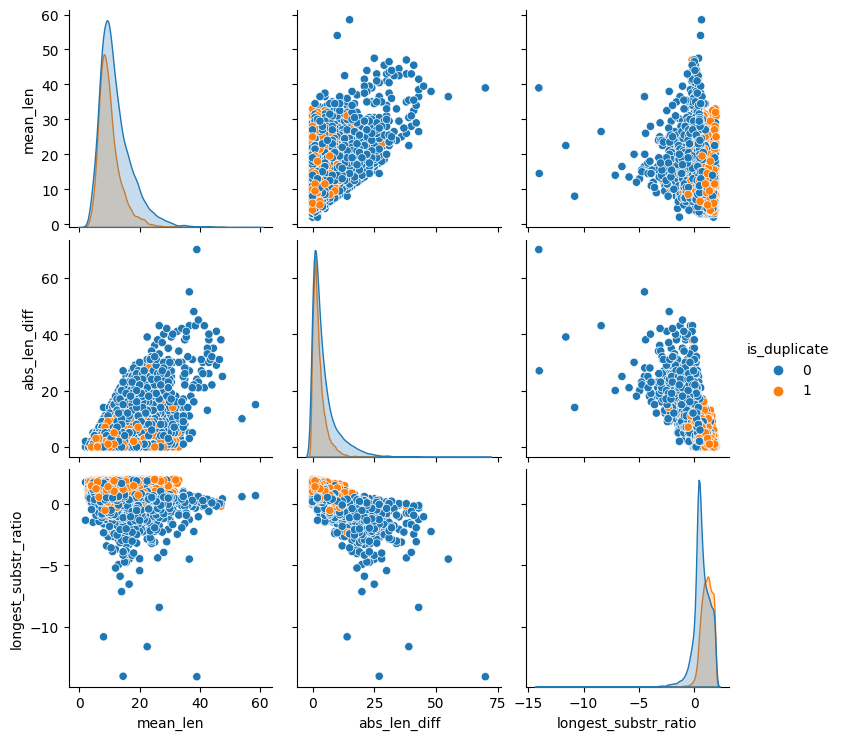

In [43]:
sns.pairplot(new_df[['mean_len', 'abs_len_diff','longest_substr_ratio', 'is_duplicate']],hue='is_duplicate')

duplicates tend to have a higher longest common substring ratio.

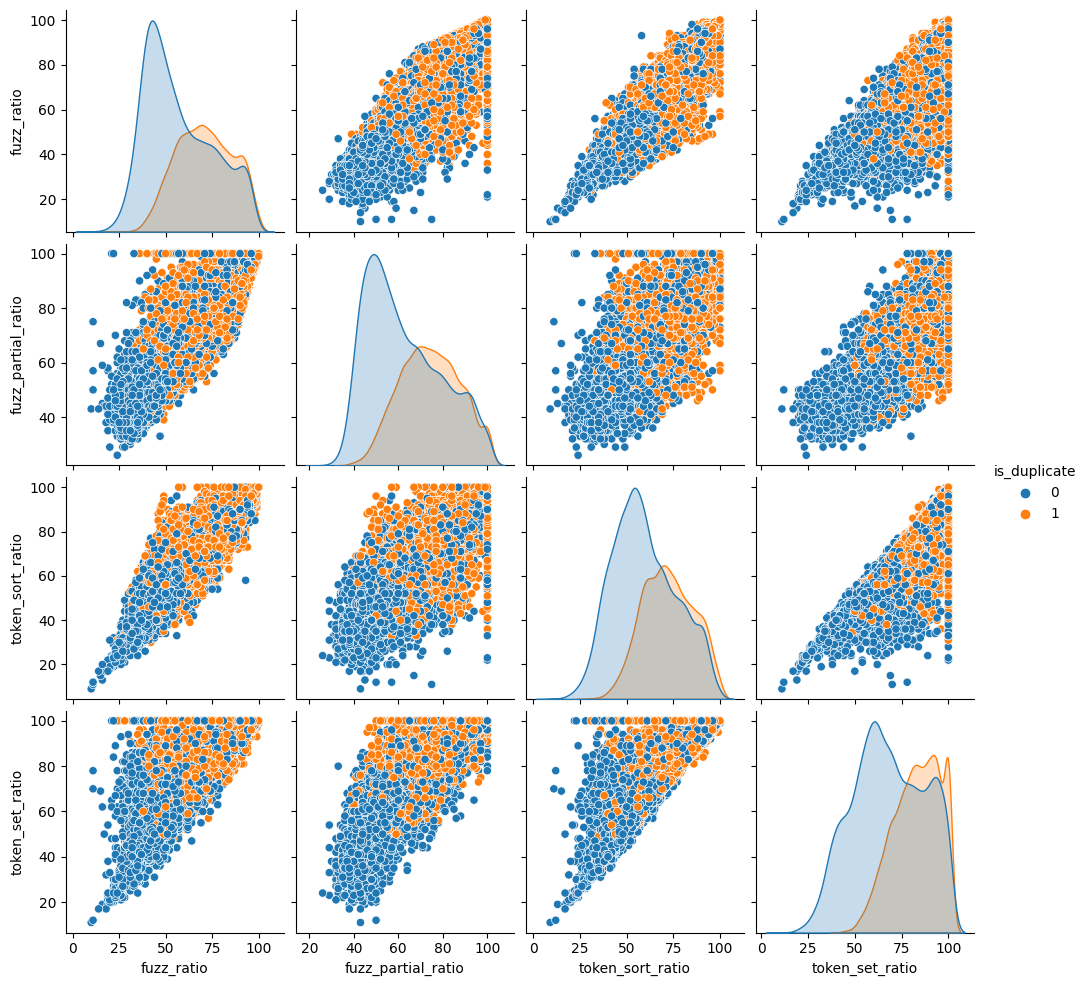

In [44]:
sns.pairplot(new_df[['fuzz_ratio', 'fuzz_partial_ratio','token_sort_ratio','token_set_ratio', 'is_duplicate']],hue='is_duplicate')

The diagonal elements show that duplicates tend to have higher similarity scores across all features. hence these features are helpful in determining duplicates. token_set_ratio appears to be particularly useful, as it shows a more pronounced separation between duplicates and non-duplicates.

#### Applying tsne for dimensionality reduction of 15 features (Generated after cleaning the data)) to 3D

In [23]:
from sklearn.preprocessing import MinMaxScaler

X = MinMaxScaler().fit_transform(new_df[['cwc_min', 'cwc_max', 'csc_min', 'csc_max' , 'ctc_min' , 'ctc_max' , 'last_word_eq', 'first_word_eq' , 'abs_len_diff' , 'mean_len' , 'token_set_ratio' , 'token_sort_ratio' ,  'fuzz_ratio' , 'fuzz_partial_ratio' , 'longest_substr_ratio']])
y = new_df['is_duplicate'].values

In [48]:
from sklearn.manifold import TSNE

tsne2d = TSNE(
    n_components=2,
    init='random', # pca
    random_state=101,
    method='barnes_hut',
    n_iter=1000,
    verbose=2,
    angle=0.5
).fit_transform(X)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 20000 samples in 0.047s...
[t-SNE] Computed neighbors for 20000 samples in 13.920s...
[t-SNE] Computed conditional probabilities for sample 1000 / 20000
[t-SNE] Computed conditional probabilities for sample 2000 / 20000
[t-SNE] Computed conditional probabilities for sample 3000 / 20000
[t-SNE] Computed conditional probabilities for sample 4000 / 20000
[t-SNE] Computed conditional probabilities for sample 5000 / 20000
[t-SNE] Computed conditional probabilities for sample 6000 / 20000
[t-SNE] Computed conditional probabilities for sample 7000 / 20000
[t-SNE] Computed conditional probabilities for sample 8000 / 20000
[t-SNE] Computed conditional probabilities for sample 9000 / 20000
[t-SNE] Computed conditional probabilities for sample 10000 / 20000
[t-SNE] Computed conditional probabilities for sample 11000 / 20000
[t-SNE] Computed conditional probabilities for sample 12000 / 20000
[t-SNE] Computed conditional probabilities for sa

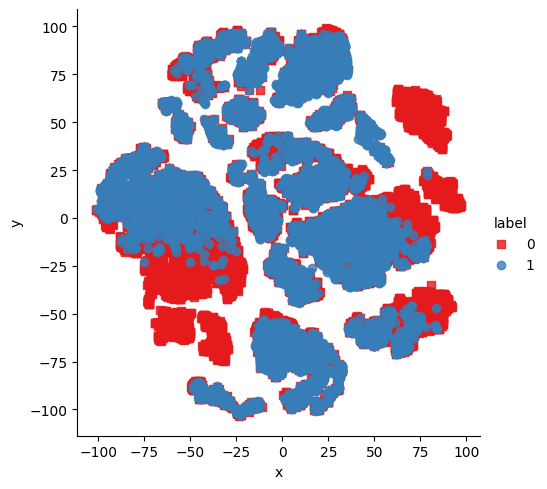

In [51]:
x_df = pd.DataFrame({'x':tsne2d[:,0], 'y':tsne2d[:,1] ,'label':y})

# draw the plot in appropriate place in the grid
sns.lmplot(data=x_df, x='x', y='y', hue='label', fit_reg=False, height=5,palette="Set1",markers=['s','o'])

Good Separation in Some Regions: Some clusters are predominantly red or blue, indicating regions of the feature space where one class is more dominant. These areas suggest that the derived features are useful in identifying those instances.

Mixed Clusters: In regions where red and blue points are mixed, the features might not be sufficient to differentiate between the two classes. Additional features or different types of features might be needed to improve classification.

Complex Decision Boundary: The presence of mixed clusters suggests that the decision boundary between the two classes is complex. This complexity can be addressed with more sophisticated models or feature engineering.

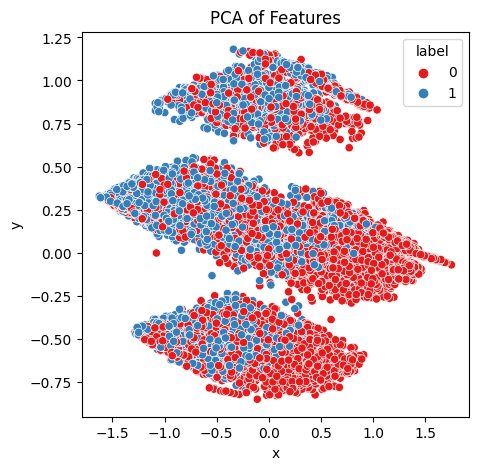

In [54]:
from sklearn.decomposition import PCA

# Perform PCA
pca = PCA(n_components=3)
pca_result = pca.fit_transform(X)

# Create a DataFrame for the PCA results
pca_df = pd.DataFrame({'x': pca_result[:, 0], 'y': pca_result[:, 1], 'label': y})

# Plot the PCA results
plt.figure(figsize=(5, 5))
sns.scatterplot(data=pca_df, x='x', y='y', hue='label', palette="Set1", markers=['s', 'o'])
plt.title('PCA of Features')
plt.show()


In this particular case PCA is not helpful as it doesnt preserve the local structure of the relationship between features rather focusses on global structure.  

In [55]:
tsne3d = TSNE(
    n_components=3,
    init='random', # pca
    random_state=101,
    method='barnes_hut',
    n_iter=1000,
    verbose=2,
    angle=0.5
).fit_transform(X)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 20000 samples in 0.089s...
[t-SNE] Computed neighbors for 20000 samples in 5.516s...
[t-SNE] Computed conditional probabilities for sample 1000 / 20000
[t-SNE] Computed conditional probabilities for sample 2000 / 20000
[t-SNE] Computed conditional probabilities for sample 3000 / 20000
[t-SNE] Computed conditional probabilities for sample 4000 / 20000
[t-SNE] Computed conditional probabilities for sample 5000 / 20000
[t-SNE] Computed conditional probabilities for sample 6000 / 20000
[t-SNE] Computed conditional probabilities for sample 7000 / 20000
[t-SNE] Computed conditional probabilities for sample 8000 / 20000
[t-SNE] Computed conditional probabilities for sample 9000 / 20000
[t-SNE] Computed conditional probabilities for sample 10000 / 20000
[t-SNE] Computed conditional probabilities for sample 11000 / 20000
[t-SNE] Computed conditional probabilities for sample 12000 / 20000
[t-SNE] Computed conditional probabilities for sam

In [56]:
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.offline as py
py.init_notebook_mode(connected=True)

trace1 = go.Scatter3d(
    x=tsne3d[:,0],
    y=tsne3d[:,1],
    z=tsne3d[:,2],
    mode='markers',
    marker=dict(
        sizemode='diameter',
        color = y,
        colorscale = 'Portland',
        colorbar = dict(title = 'duplicate'),
        line=dict(color='rgb(255, 255, 255)'),
        opacity=0.75
    )
)

data=[trace1]
layout=dict(height=800, width=800, title='3d embedding with engineered features')
fig=dict(data=data, layout=layout)
py.iplot(fig, filename='3DBubble')

In [24]:
ques_df = new_df[['question1','question2']]
ques_df.head()

question1  \
398782  what is the best marketing automation tool for...   
115086   i am poor but i want to invest  what should i do   
327711  i am from india and live abroad  i met a guy f...   
367788  why do so many people in the u s  hate the sou...   
151235                 consequences of bhopal gas tragedy   

                                                question2  
398782  what is the best marketing automation tool for...  
115086  i am quite poor and i want to be very rich  wh...  
327711  t i e t to thapar university to thapar univers...  
367788  my boyfriend doesnt feel guilty when he hurts ...  
151235  what was the reason behind the bhopal gas tragedy

In [25]:
final_df = new_df.drop(columns=['id','qid1','qid2','question1','question2'])
print(final_df.shape)

(20000, 23)


In [26]:
final_df.head(2)

is_duplicate  q1_len  q2_len  q1_num_words  q2_num_words  word_common  \
398782             1      75      76            13            13           12   
115086             0      48      56            13            16            8   

        word_total  word_share   cwc_min   cwc_max  ...   ctc_max  \
398782          26        0.46  0.874989  0.874989  ...  0.923070   
115086          24        0.33  0.666644  0.499988  ...  0.466664   

        last_word_eq  first_word_eq  abs_len_diff  mean_len  \
398782             1              1             0      13.0   
115086             1              1             3      13.5   

        longest_substr_ratio  fuzz_ratio  fuzz_partial_ratio  \
398782              1.960526          99                  99   
115086              1.142857          69                  67   

        token_sort_ratio  token_set_ratio  
398782                99               99  
115086                67               74  

[2 rows x 23 columns]

In [27]:
from sklearn.feature_extraction.text import CountVectorizer
# merge texts
questions = list(ques_df['question1']) + list(ques_df['question2'])

cv = CountVectorizer(max_features=2000)
q1_arr, q2_arr = np.vsplit(cv.fit_transform(questions).toarray(),2) #The fit_transform method returns a sparse matrix. 
                                                                    #Using .toarray() converts this sparse matrix to 
                                                                    #a dense numpy array.

In [28]:
temp_df1 = pd.DataFrame(q1_arr, index= ques_df.index)
temp_df2 = pd.DataFrame(q2_arr, index= ques_df.index)
temp_df = pd.concat([temp_df1, temp_df2], axis=1)
temp_df.shape

(20000, 4000)

In [29]:
final_df = pd.concat([final_df, temp_df], axis=1)
print(final_df.shape)
final_df.head(2)

(20000, 4023)


is_duplicate  q1_len  q2_len  q1_num_words  q2_num_words  word_common  \
398782             1      75      76            13            13           12   
115086             0      48      56            13            16            8   

        word_total  word_share   cwc_min   cwc_max  ...  1990  1991  1992  \
398782          26        0.46  0.874989  0.874989  ...     0     0     0   
115086          24        0.33  0.666644  0.499988  ...     0     0     0   

        1993  1994  1995  1996  1997  1998  1999  
398782     0     0     0     0     0     0     0  
115086     0     0     0     0     0     0     0  

[2 rows x 4023 columns]

In [30]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(final_df.iloc[:,1:].values,final_df.iloc[:,0].values,test_size=0.2,random_state=1)

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.7805

In [32]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
y_pred1 = xgb.predict(X_test)
accuracy_score(y_test,y_pred1)

0.78825

In [33]:
from sklearn.metrics import confusion_matrix

In [34]:
# for random forest model
confusion_matrix(y_test,y_pred)

array([[2132,  396],
       [ 482,  990]], dtype=int64)

In [35]:
# for xgboost model
confusion_matrix(y_test,y_pred1)

array([[2102,  426],
       [ 421, 1051]], dtype=int64)

In this particular usecase , cost of misclassification(false positive) is pretty high compared to false negatives.ie merging non duplicate qs will affect user experience badly. Hence we need a model which reuces the false positives. In this case, FP are less in Random Forest model although the accuracy is slighltly better with XGBoost model. Hence we will use Random Forest as our model

#### Inference

In [36]:
def test_common_words(q1,q2):
    w1 = set(map(lambda word: word.lower().strip(), q1.split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), q2.split(" ")))    
    return len(w1 & w2)

In [37]:
def test_total_words(q1,q2):
    w1 = set(map(lambda word: word.lower().strip(), q1.split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), q2.split(" ")))    
    return (len(w1) + len(w2))

In [38]:
def test_fetch_token_features(q1,q2):
    
    SAFE_DIV = 0.0001 

    STOP_WORDS = stopwords.words("english")
    
    token_features = [0.0]*8
    
    # Converting the Sentence into Tokens: 
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    
    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return token_features

    # Get the non-stopwords in Questions
    q1_words = set([word for word in q1_tokens if word not in STOP_WORDS])
    q2_words = set([word for word in q2_tokens if word not in STOP_WORDS])
    
    #Get the stopwords in Questions
    q1_stops = set([word for word in q1_tokens if word in STOP_WORDS])
    q2_stops = set([word for word in q2_tokens if word in STOP_WORDS])
    
    # Get the common non-stopwords from Question pair
    common_word_count = len(q1_words.intersection(q2_words))
    
    # Get the common stopwords from Question pair
    common_stop_count = len(q1_stops.intersection(q2_stops))
    
    # Get the common Tokens from Question pair
    common_token_count = len(set(q1_tokens).intersection(set(q2_tokens)))
    
    
    token_features[0] = common_word_count / (min(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[1] = common_word_count / (max(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[2] = common_stop_count / (min(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[3] = common_stop_count / (max(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[4] = common_token_count / (min(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    token_features[5] = common_token_count / (max(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    
    # Last word of both question is same or not
    token_features[6] = int(q1_tokens[-1] == q2_tokens[-1])
    
    # First word of both question is same or not
    token_features[7] = int(q1_tokens[0] == q2_tokens[0])
    
    return token_features

In [39]:
def test_fetch_length_features(q1,q2):
    
    length_features = [0.0]*3
    
    # Converting the Sentence into Tokens: 
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    
    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return length_features
    
    # Absolute length features
    length_features[0] = abs(len(q1_tokens) - len(q2_tokens))
    
    #Average Token Length of both Questions
    length_features[1] = (len(q1_tokens) + len(q2_tokens))/2
    
    # Longest common substring using edit distance
    lcs_length = len(q1) + len(q2) - 2 * edit_distance(q1, q2)
    length_features[2] = lcs_length / (min(len(q1), len(q2)) + 1)
    
    return length_features

In [40]:
def test_fetch_fuzzy_features(q1,q2):
    
    fuzzy_features = [0.0]*4
    
    # fuzz_ratio
    fuzzy_features[0] = fuzz.QRatio(q1, q2)

    # fuzz_partial_ratio
    fuzzy_features[1] = fuzz.partial_ratio(q1, q2)

    # token_sort_ratio
    fuzzy_features[2] = fuzz.token_sort_ratio(q1, q2)

    # token_set_ratio
    fuzzy_features[3] = fuzz.token_set_ratio(q1, q2)

    return fuzzy_features

In [41]:
def query_point_creator(q1,q2):
    
    input_query = []
    
    # preprocess
    q1 = preprocess(q1)
    q2 = preprocess(q2)
    
    # fetch basic features
    input_query.append(len(q1))
    input_query.append(len(q2))
    
    input_query.append(len(q1.split(" ")))
    input_query.append(len(q2.split(" ")))
    
    input_query.append(test_common_words(q1,q2))
    input_query.append(test_total_words(q1,q2))
    input_query.append(round(test_common_words(q1,q2)/test_total_words(q1,q2),2))
    
    # fetch token features
    token_features = test_fetch_token_features(q1,q2)
    input_query.extend(token_features)
    
    # fetch length based features
    length_features = test_fetch_length_features(q1,q2)
    input_query.extend(length_features)
    
    # fetch fuzzy features
    fuzzy_features = test_fetch_fuzzy_features(q1,q2)
    input_query.extend(fuzzy_features)
    
    # bow feature for q1
    q1_bow = cv.transform([q1]).toarray()
    
    # bow feature for q2
    q2_bow = cv.transform([q2]).toarray()
    
    
    
    return np.hstack((np.array(input_query).reshape(1,22),q1_bow,q2_bow))

In [44]:
q1 = 'Where is the capital of India?'
q2 = 'What is the current capital of Pakistan?'
q3 = 'Which city serves as the capital of India?'
q4 = 'What is the business capital of India?'

In [45]:
rf.predict(query_point_creator(q1,q2))

array([0], dtype=int64)

In [46]:
rf.predict(query_point_creator(q1,q3))

array([1], dtype=int64)

In [47]:
cv

CountVectorizer(max_features=2000)

In [48]:
import pickle

pickle.dump(rf,open('model2.pkl','wb'))
pickle.dump(cv,open('cv.pkl','wb'))